In [107]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import pickle

import warnings
warnings.filterwarnings('ignore')

Sklearn

In [108]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

KNN Package

In [109]:
from sklearn.neighbors import KNeighborsClassifier

SVM Package

In [110]:
from sklearn.svm import SVC

DT Package

In [111]:
from sklearn.tree import DecisionTreeClassifier

XGBoost Package

In [112]:
import xgboost as xgb

Ensemble Voting Package

In [113]:
from sklearn.ensemble import VotingClassifier

Deeplearning Package

In [114]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
import tensorflow as tf

Data loading

In [115]:
# with open('heart.pickle','rb') as read_file:
#     df_raw = pickle.load(read_file)
df_raw = pd.read_csv('heart.csv')

df = df_raw.copy()
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


The basic information of the dataset:
- Age: age of the patient [years] 
- Sex: sex of the patient [M: Male, F: Female] 
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] 
- RestingBP: resting blood pressure [mm Hg] 
- Cholesterol: serum cholesterol [mm/dl] 
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] 
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202] 
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No] 
- Oldpeak: oldpeak = ST [Numeric value measured in depression] 
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] 

- HeartDisease: output class [1: heart disease, 0: Normal]

In [116]:
for col in df.columns:
    print(col)
    print(df[col].value_counts(sort=True, normalize=True))
    print('\n')

Age
54    0.055556
58    0.045752
55    0.044662
56    0.041394
57    0.041394
52    0.039216
51    0.038126
59    0.038126
62    0.038126
53    0.035948
60    0.034858
48    0.033769
61    0.033769
63    0.032680
50    0.027233
46    0.026144
41    0.026144
43    0.026144
64    0.023965
65    0.022876
49    0.022876
47    0.020697
44    0.020697
42    0.019608
45    0.019608
38    0.017429
67    0.016340
39    0.016340
66    0.014161
69    0.014161
40    0.014161
35    0.011983
37    0.011983
68    0.010893
34    0.007625
74    0.007625
70    0.007625
36    0.006536
71    0.005447
32    0.005447
72    0.004357
29    0.003268
75    0.003268
33    0.002179
77    0.002179
76    0.002179
31    0.002179
30    0.001089
28    0.001089
73    0.001089
Name: Age, dtype: float64


Sex
M    0.78976
F    0.21024
Name: Sex, dtype: float64


ChestPainType
ASY    0.540305
NAP    0.221133
ATA    0.188453
TA     0.050109
Name: ChestPainType, dtype: float64


RestingBP
120    0.143791
130    0.128540
14

Requirement：Univariate analysis

Using a histogram, plot a distribution of the numerical values

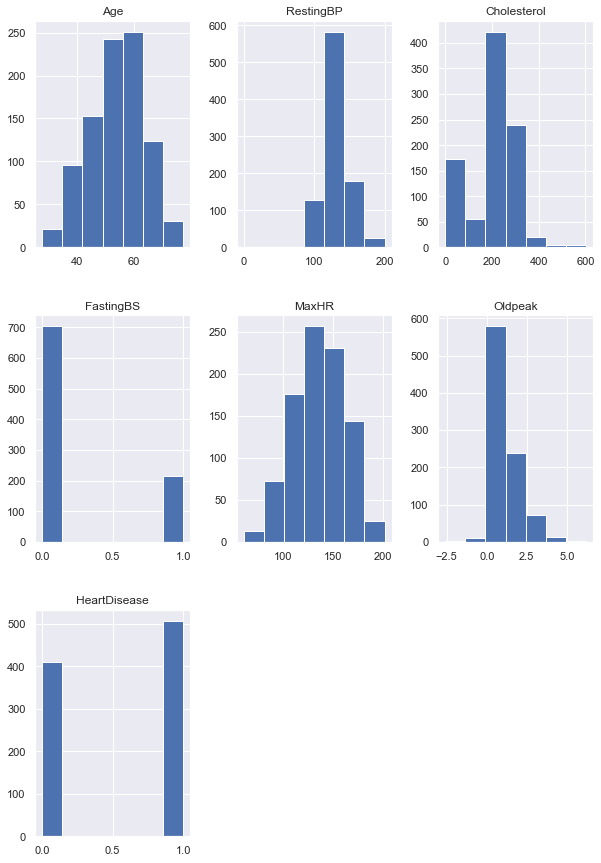

In [117]:
df.hist(bins=7,figsize=(10,15))
plt.show()

Requirement：Bivariate analysis (1)

Plot a histogram showing the age against the target variable (positive vs. negative cases)

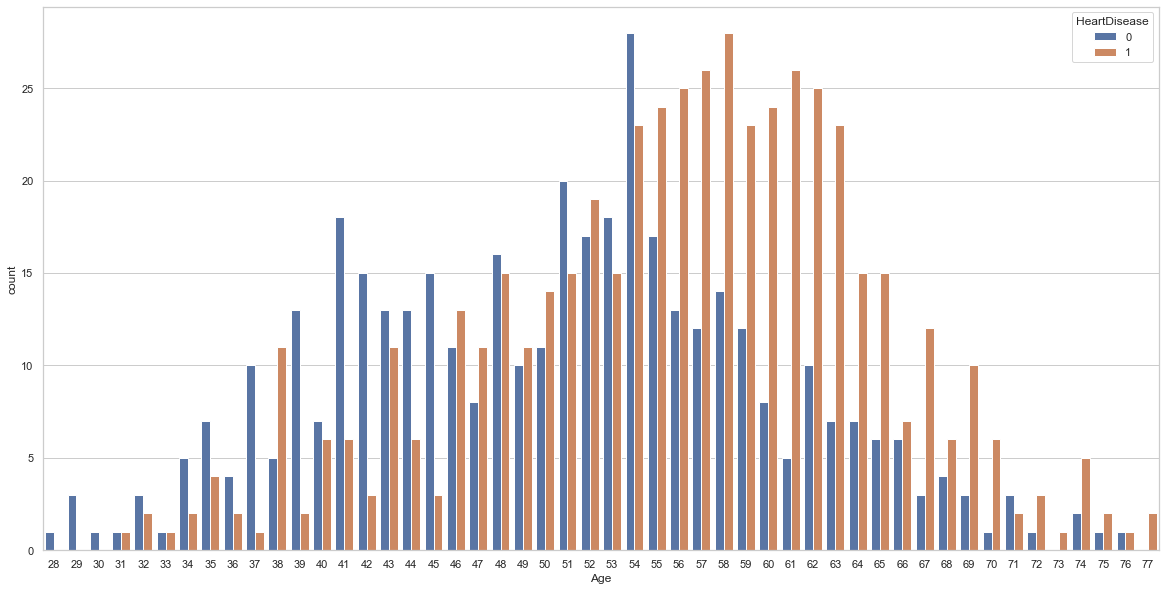

In [118]:
# ‘hue’ is used to visualize the effect of an additional variable to the current distribution.
plt.figure(figsize=(20,10))
sns.set_style(style='whitegrid')
sns.countplot(df.Age.astype(int), hue = df.HeartDisease)
plt.show()

Requirement：Bivariate analysis (2)

Compare the median age for male and female using a boxplot

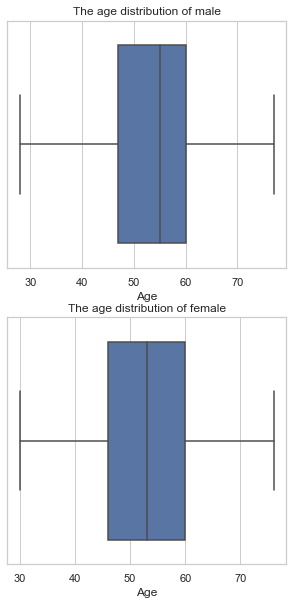

The median age of male and female are 55.0 and 53.0


In [119]:
M_df= df.loc[df['Sex'] == 'M']
F_df = df.loc[df['Sex'] == 'F']

plt.figure(figsize=(5, 10))
plt.subplot(2, 1, 1)
sns.boxplot(x='Age', data=M_df)
plt.title("The age distribution of male")
plt.subplot(2, 1, 2)
sns.boxplot(x='Age', data=F_df)
plt.title("The age distribution of female")

plt.show()

print("The median age of male and female are {} and {}"
      .format(M_df['Age'].median(), F_df['Age'].median()))

Requirement： Feature Engineering (4)

Convert categorical data into numerical data using one-hot encoding or any other label encoding approach

hard_encode [Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope]

In [120]:
df.head() # this is for comparsion

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [121]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


Requirement：Feature Engineering (1)

Check for duplicates & missing values. Drop, if present

In [122]:
df.isnull().sum() # it seems like there are no missing values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [123]:
print(df.shape)
df = df.drop_duplicates(subset=None, keep='first', inplace=False)
print(df.shape)
# it seems like there are no duplicated values

(918, 12)
(918, 12)


Visualization after encoding

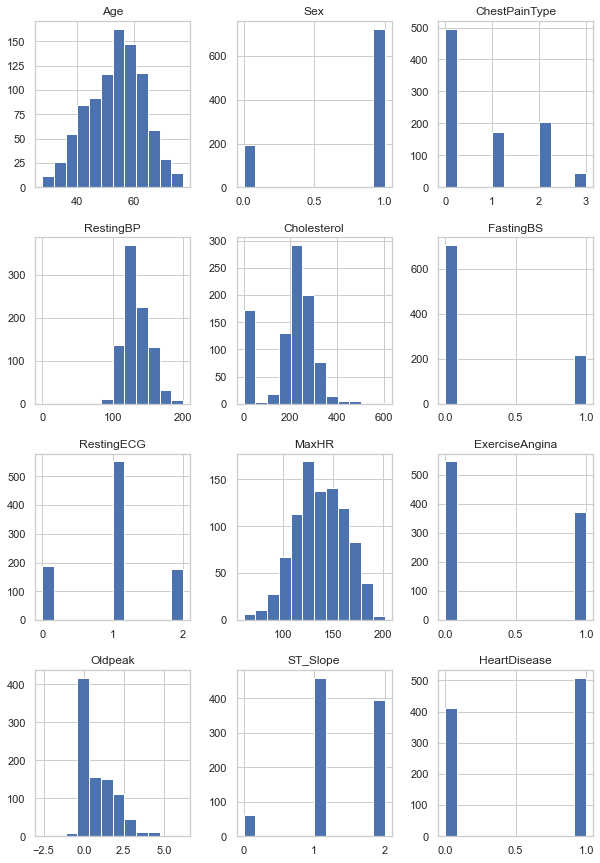

In [124]:
df.hist(bins=12,figsize=(10,15))
plt.show()

Requirement：Feature Engineering (2)

There are some outliers in the dataset, (e.g., 0 cholesterol, negative oldpeak) handle them before building the model

Check the outliers of [Age、RestingBP、Cholesterol、MaxHR、Oldpeak]

- Age：null

- RestingBP：<90 | >170

- Cholesterol: =0 | >410

- MaxHR: <65

- Oldpeak: <-2 | >3.8


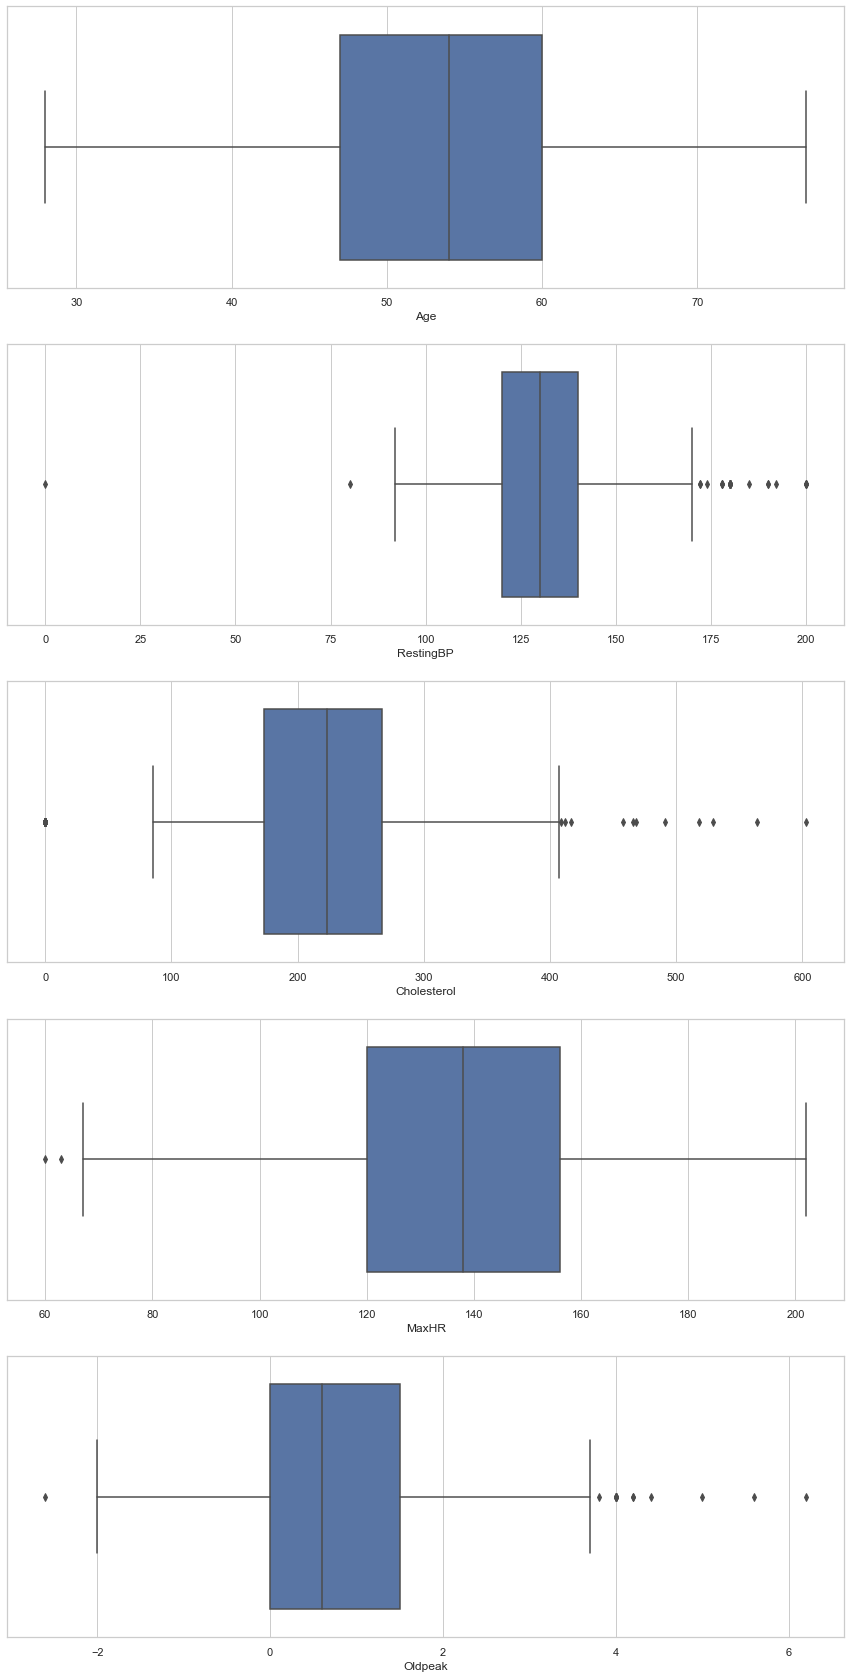

In [125]:
plt.figure(figsize=(15,30))
sns.set_style(style='whitegrid')

plt.subplot(5, 1, 1)
sns.boxplot(x='Age',data=df)
plt.subplot(5, 1, 2)
sns.boxplot(x='RestingBP',data=df)
plt.subplot(5, 1, 3)
sns.boxplot(x='Cholesterol',data=df)
plt.subplot(5, 1, 4)
sns.boxplot(x='MaxHR',data=df)
plt.subplot(5, 1, 5)
sns.boxplot(x='Oldpeak',data=df)

plt.show()

Outlier Treatment

- Age：null

- RestingBP：<90 | >170

- Cholesterol: =0 | >410

- MaxHR: <65

- Oldpeak: <-2 | >3.8

In [126]:
for i in df.columns:
    df[i] = df[i].astype(int)

df.loc[(df['RestingBP'] < 90) | (df['RestingBP'] > 170)] = np.nan
df.loc[(df['Cholesterol'] == 0) | (df['Cholesterol'] > 410)] = np.nan
df.loc[(df['MaxHR'] < 65)] = np.nan
df.loc[(df['Oldpeak'] < 0) | (df['Oldpeak'] > 3.8)] = np.nan

# df.loc[(df['Cholesterol'] == 0)] = np.nan
# df.loc[(df['Oldpeak'] < 0)] = np.nan

print(df.isnull().sum())
df = df.dropna()

Age               214
Sex               214
ChestPainType     214
RestingBP         214
Cholesterol       214
FastingBS         214
RestingECG        214
MaxHR             214
ExerciseAngina    214
Oldpeak           214
ST_Slope          214
HeartDisease      214
dtype: int64


Requirement：Feature Engineering (3)

Check for class imbalance and handle, if necessary

In [127]:
# from data, we can see distribution of the 'HeartDisease' is relatively balanced
# There is no imbalance in the dataset

Requirement：Multivariate Analysis

Use a heatmap to check for correlation between predictor variables

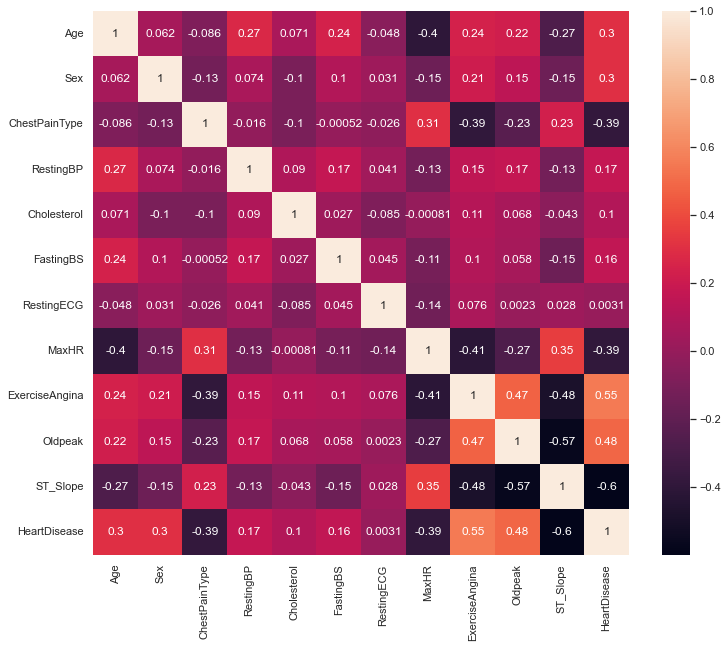

In [128]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr,
            xticklabels = corr.columns,
            yticklabels = corr.columns,
            annot=True)
plt.show()

Select the features based on correlation


In [129]:
temp = corr.where(np.abs(corr) > 0.4).stack().sort_values(ascending=False)
temp = temp.where(temp < 1).dropna()
print(temp)

ExerciseAngina  HeartDisease      0.552061
HeartDisease    ExerciseAngina    0.552061
Oldpeak         HeartDisease      0.484369
HeartDisease    Oldpeak           0.484369
ExerciseAngina  Oldpeak           0.469342
Oldpeak         ExerciseAngina    0.469342
Age             MaxHR            -0.404653
MaxHR           Age              -0.404653
ExerciseAngina  MaxHR            -0.413740
MaxHR           ExerciseAngina   -0.413740
ST_Slope        ExerciseAngina   -0.480982
ExerciseAngina  ST_Slope         -0.480982
ST_Slope        Oldpeak          -0.568856
Oldpeak         ST_Slope         -0.568856
ST_Slope        HeartDisease     -0.599526
HeartDisease    ST_Slope         -0.599526
dtype: float64


Filter the features

In [130]:
# df.drop(['Oldpeak'], axis=1, inplace=True)
# df.head()
# I have tested and all features are important, though there are some correlated ones

Data segmentation into features and target

In [131]:
df.to_pickle('heart_cleaned.pickle')
y = df.pop('HeartDisease')
X = df.copy()

Requirement：Feature Engineering (5)

Scale the data using a standard scaler


In [132]:
ss = StandardScaler()
columns = X.columns
X = ss.fit_transform(X)
X = pd.DataFrame(X, columns=columns)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.332986,0.562039,0.144832,0.549306,0.962436,-0.439568,0.115426,1.288001,-0.776946,-0.755625,0.974379
1,-0.388794,-1.779236,1.185255,1.848521,-1.175766,-0.439568,0.115426,0.631231,-0.776946,0.381042,-0.749145
2,-1.647717,0.562039,0.144832,-0.100302,0.844737,-0.439568,1.708762,-1.749558,-0.776946,-0.755625,0.974379
3,-0.493704,-1.779236,-0.895592,0.419384,-0.508804,-0.439568,0.115426,-1.339078,1.287091,0.381042,-0.749145
4,0.135757,0.562039,1.185255,1.198913,-0.881518,-0.439568,0.115426,-0.764404,-0.776946,-0.755625,0.974379


Dataset split into train and test

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

KNN Model

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.92      0.87      0.89       114
         1.0       0.86      0.91      0.88        98

    accuracy                           0.89       212
   macro avg       0.89      0.89      0.89       212
weighted avg       0.89      0.89      0.89       212

the accuracy of this model is:  0.8867924528301887
the F1 of this model is:  0.8811881188118811
the precision of this model is:  0.8557692307692307
the recall of this model is:  0.9081632653061225

 The confusion matrix of this model is:  
 [[99 15]
 [ 9 89]]

 The AUC of this model is 0.8882921589688508


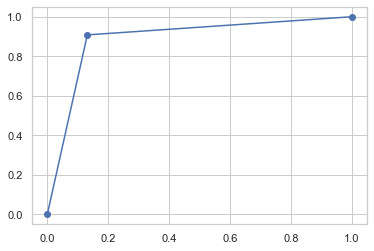

In [134]:
model = KNeighborsClassifier()
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

hyperparameters = dict(p=p,weights=weights,metric=metric)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

knn_model = grid_search.fit(X_train, y_train)

y_predicted_knn = knn_model.predict(X_test)
print("Classification Report is:\n",classification_report(y_test, y_predicted_knn))
m = confusion_matrix(y_test , y_predicted_knn)
print("the accuracy of this model is: ",
      accuracy_score(y_test , y_predicted_knn))
print("the F1 of this model is: ",
      f1_score(y_test , y_predicted_knn))
print("the precision of this model is: ",
      precision_score(y_test , y_predicted_knn))
print("the recall of this model is: ",
      recall_score(y_test , y_predicted_knn))
print("\n The confusion matrix of this model is: ", "\n", m)

# Plotting the ROCCurve of bayes model
fpr_bayes, tpr_bayes, thresold_bayes = roc_curve(y_test, y_predicted_knn)
AUC = auc(fpr_bayes, tpr_bayes)
print(f"\n The AUC of this model is {AUC}")
plt.figure()
plt.plot(fpr_bayes, tpr_bayes, marker="o")
plt.show()

SVM Model

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.91      0.86      0.88       114
         1.0       0.85      0.90      0.87        98

    accuracy                           0.88       212
   macro avg       0.88      0.88      0.88       212
weighted avg       0.88      0.88      0.88       212
 

the accuracy of this model is:  0.8773584905660378
the F1 of this model is:  0.8712871287128713
the precision of this model is:  0.8461538461538461
the recall of this model is:  0.8979591836734694

 The confusion matrix of SVM is:  
 [[98 16]
 [10 88]]

 The AUC of this model is 0.8788041532402435


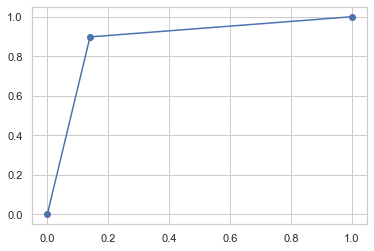

In [135]:
model = SVC()
kernel = ['rbf']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale', 'auto']

grid = dict(kernel=kernel, C=C, gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, n_jobs=-1, scoring='f1',error_score=0)

svm = grid_search.fit(X_train, y_train)

y_predicted_svm = svm.predict(X_test)

print("Classification Report is:\n",classification_report(y_test, y_predicted_svm), "\n")
m_svm = confusion_matrix(y_test , y_predicted_svm)
print("the accuracy of this model is: ",
      accuracy_score(y_test , y_predicted_svm))
print("the F1 of this model is: ",
      f1_score(y_test , y_predicted_svm))
print("the precision of this model is: ",
      precision_score(y_test , y_predicted_svm))
print("the recall of this model is: ",
      recall_score(y_test , y_predicted_svm))
print("\n The confusion matrix of SVM is: ", "\n", m_svm)

# # Plotting the ROCCurve of SVM
fpr_svm, tpr_svm, thresold_svm = roc_curve(y_test, y_predicted_svm)
AUC = auc(fpr_svm, tpr_svm)
print(f"\n The AUC of this model is {AUC}")
plt.figure()
plt.plot(fpr_svm, tpr_svm, marker="o")
plt.show()

Decision Tree Model

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Classification Report is:
               precision    recall  f1-score   support

         0.0       0.90      0.78      0.84       114
         1.0       0.78      0.90      0.83        98

    accuracy                           0.83       212
   macro avg       0.84      0.84      0.83       212
weighted avg       0.84      0.83      0.83       212

the accuracy of this model is:  0.8349056603773585
the F1 of this model is:  0.8341232227488151
the precision of this model is:  0.7787610619469026
the recall of this model is:  0.8979591836734694

 The confusion matrix of decision tree is:  
 [[89 25]
 [10 88]]

 The AUC of this model is 0.8393304690297172


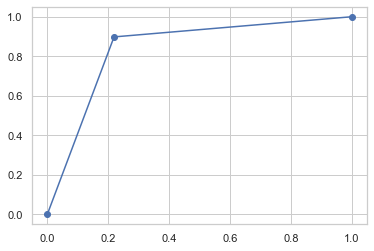

In [136]:
dt = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=10, n_jobs=-1, verbose=1, scoring = "f1")

decision_tree = grid_search.fit(X_train, y_train)
y_predicted_tree = decision_tree.predict(X_test)

print("Classification Report is:\n",classification_report(y_test, y_predicted_tree))
m_tree = confusion_matrix(y_test , y_predicted_tree)
print("the accuracy of this model is: ",
      accuracy_score(y_test , y_predicted_tree))
print("the F1 of this model is: ",
      f1_score(y_test , y_predicted_tree))
print("the precision of this model is: ",
      precision_score(y_test , y_predicted_tree))
print("the recall of this model is: ",
      recall_score(y_test , y_predicted_tree))
print("\n The confusion matrix of decision tree is: ", "\n", m_tree)

# Plotting the ROCCurve of decision tree
fpr_tree, tpr_tree, thresold_tree = roc_curve(y_test, y_predicted_tree)
AUC = auc(fpr_tree, tpr_tree)
print(f"\n The AUC of this model is {AUC}")
plt.figure()
plt.plot(fpr_tree, tpr_tree, marker="o")
plt.show()

XGboost Model

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.87      0.86      0.86       114
         1.0       0.84      0.85      0.84        98

    accuracy                           0.85       212
   macro avg       0.85      0.85      0.85       212
weighted avg       0.85      0.85      0.85       212

the accuracy of this model is:  0.8537735849056604
the F1 of this model is:  0.8426395939086294
the precision of this model is:  0.8383838383838383
the recall of this model is:  0.8469387755102041

 The confusion matrix of XGboost is:  
 [[98 16]
 [15 83]]

 The AUC of this model is 0.8532939491586108


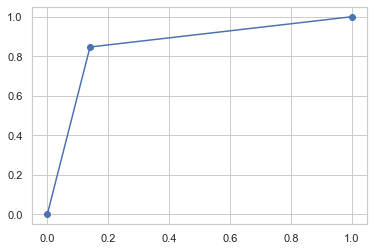

In [137]:
xgb_clf = xgb.XGBClassifier(eval_metric='auc', n_jobs=-1)
xgb_clf = xgb_clf.fit(X_train, y_train)

y_predicted_xgb = xgb_clf.predict(X_test)

print("Classification Report is:\n",classification_report(y_test, y_predicted_xgb))
m_xgb = confusion_matrix(y_test , y_predicted_xgb)
print("the accuracy of this model is: ",
      accuracy_score(y_test , y_predicted_xgb))
print("the F1 of this model is: ",
      f1_score(y_test , y_predicted_xgb))
print("the precision of this model is: ",
      precision_score(y_test , y_predicted_xgb))
print("the recall of this model is: ",
      recall_score(y_test , y_predicted_xgb))
print("\n The confusion matrix of XGboost is: ", "\n", m_xgb)

# Plotting the ROCCurve of decision tree
fpr_xgb, tpr_xgb, thresold_xgb = roc_curve(y_test, y_predicted_xgb)
AUC = auc(fpr_xgb, tpr_xgb)
print(f"\n The AUC of this model is {AUC}")
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, marker="o")
plt.show()

Ensemble Model

KNN(k=5), SVM(kernel=rbf), DT, XGboost

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       114
         1.0       0.88      0.90      0.89        98

    accuracy                           0.90       212
   macro avg       0.90      0.90      0.90       212
weighted avg       0.90      0.90      0.90       212

the accuracy of this model is:  0.8962264150943396
the F1 of this model is:  0.888888888888889
the precision of this model is:  0.88
the recall of this model is:  0.8979591836734694

 The confusion matrix of ensemble model is:  
 [[102  12]
 [ 10  88]]

 The AUC of this model is 0.8963480128893664


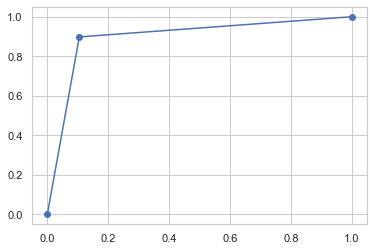

In [138]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
svm_clf = SVC(kernel='rbf', probability=True)
dt_clf = DecisionTreeClassifier(random_state=42)
xgboost_clf = xgb.XGBClassifier(eval_metric='auc', n_jobs=-1)

voting_clf = VotingClassifier(estimators=[('knn', knn_clf), 
                                          ('svm', svm_clf),
                                          ('dt', dt_clf), 
                                          ('xgboost', xgboost_clf)], 
                              voting='soft', weights=[1, 1, 1, 1])

# voting_clf = VotingClassifier(estimators=[('knn', knn_clf), 
#                                           ('svm', svm_clf),
#                                           ('dt', dt_clf), 
#                                           ('xgboost', xgboost_clf)], 
#                               voting='hard')
voting_clf.fit(X_train, y_train)

y_predicted_voting = voting_clf.predict(X_test)

print("Classification Report is:\n",classification_report(y_test, y_predicted_voting))
m_voting = confusion_matrix(y_test , y_predicted_voting)
print("the accuracy of this model is: ",
      accuracy_score(y_test , y_predicted_voting))
print("the F1 of this model is: ",
      f1_score(y_test , y_predicted_voting))
print("the precision of this model is: ",
      precision_score(y_test , y_predicted_voting))
print("the recall of this model is: ",
      recall_score(y_test , y_predicted_voting))
print("\n The confusion matrix of ensemble model is: ", "\n", m_voting)

# Plotting the ROCCurve of decision tree
fpr_voting, tpr_voting, thresold_voting= roc_curve(y_test, y_predicted_voting)
AUC = auc(fpr_voting, tpr_voting)
print(f"\n The AUC of this model is {AUC}")
plt.figure()
plt.plot(fpr_voting, tpr_voting, marker="o")
plt.show()



Neural Network Model

activation function:
- softmax: logic regression
- Softplus：softplus(x)=log(1+e^x)
- Relu：as biological neuron
- tanh
- sigmoid: S curve
- hard_sigmoid: based on S curve
- linear

In [141]:
model = Sequential()
activation_functions = ['relu', 'softplus', 'tanh', 'sigmoid']
model.add(Dense(128, input_dim=X_train.shape[1], activation=activation_functions[0]))
model.add(Dropout(rate=0.3, seed=100))
model.add(Dense(64, activation=activation_functions[1]))
model.add(Dense(1, activation=activation_functions[3]))

model.compile(loss='mse',
              optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=64, batch_size=128, verbose=1)
y_predicted_keras = model.predict(X_test)

loss, accuracy = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print(
    "The loss of the Neural Network classifier on test data is = {:.2f}".format(loss))
print("The accuracy of the Neural Network classifier on test data is = {:.2f}".format(
    accuracy))

Epoch 1/64
4/4 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.5346
Epoch 2/64
4/4 [==============================] - 0s 2ms/step - loss: 0.2505 - accuracy: 0.5528
Epoch 3/64
4/4 [==============================] - 0s 2ms/step - loss: 0.2087 - accuracy: 0.6484
Epoch 4/64
4/4 [==============================] - 0s 3ms/step - loss: 0.1770 - accuracy: 0.7927
Epoch 5/64
4/4 [==============================] - 0s 3ms/step - loss: 0.1612 - accuracy: 0.8171
Epoch 6/64
4/4 [==============================] - 0s 3ms/step - loss: 0.1488 - accuracy: 0.8252
Epoch 7/64
4/4 [==============================] - 0s 3ms/step - loss: 0.1339 - accuracy: 0.8232
Epoch 8/64
4/4 [==============================] - 0s 4ms/step - loss: 0.1272 - accuracy: 0.8374
Epoch 9/64
4/4 [==============================] - 0s 3ms/step - loss: 0.1271 - accuracy: 0.8354
Epoch 10/64
4/4 [==============================] - 0s 2ms/step - loss: 0.1193 - accuracy: 0.8557
Epoch 11/64
4/4 [======================

## Comparison of Models

1. accuracy_score: Keras > KNN > SVM > Xgboost > DT
2. F1 score: KNN > SVM > Xgboost > DT
3. precision_score: KNN > SVM > Xgboost >> DT
4. Recall score: KNN > SVM = DT > Xgboost

## Comparison of ensemble models
1. The performance of "soft" voting is overall better than "hard" voting.
2. The performance of ensemble model is similar to the performance of the deep learning model.

## Analysis of The Deep Learning Model
### The effect of the number of neuron units
The results of the units of three dense layers are:
1. 128, 64, 1:
   loss: 0.11 accuracy: 0.87
2. 256, 128, 1:
   loss: 0.11 accuracy: 0.87
3. 512, 256, 1:
   loss: 0.12 accuracy: 0.86

### The effect of the activation function
1. 'relu':
   loss: 0.11 accuracy: 0.87
2. 'softplus':
   loss: 0.12 accuracy: 0.83
3. 'tanh':
   loss: 0.11 accuracy: 0.85
4. 'sigmoid':
   loss: 0.11 accuracy: 0.86
5. 'relu' + 'softplus' + 'sigmoid':
   loss: 0.10 accuracy: 0.88

### The effect of the number of loss function
1. 'binary_crossentropy':
   loss: 0.32 accuracy: 0.88
2. 'mse':
   loss: 0.09 accuracy: 0.87

### The effect of the dropout rate
1. rate=0.1:
   loss: 0.10 accuracy: 0.87
2. rate=0.3:
   loss: 0.09 accuracy: 0.89
3. rate=0.5:
   loss: 0.10 accuracy: 0.88
4. rate=0.7:
   loss: 0.10 accuracy: 0.87
5. rate=0.9:
   loss: 0.10 accuracy: 0.85

## Conclusion
1. The value of dropout rate is used to control the robustness of the model. A adequate value of dropout rate could prevent overfitting. The value of dropout rate usually is between 0.3 with 0.5.
2. The performance of activation function is important. The best activation function could be the combination of 'relu' + 'softplus' + 'sigmoid'.
3. The best model for this dataset is KNN. The worst model for this dataset is Decision Tree.
4. The ensemble model is better than its individual model.